In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#The dataset file is read using read_csv function from pandas library
df= pd.read_csv('./dataset/accepted_2007_to_2018Q4.csv')
df.shape

(2260701, 151)

In [3]:
#Count of number of missing values
df.isna().sum().sum()

108486249

In [4]:
#Printing all  the features of the data

print(list(df.columns))

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq',

In [5]:
#There are so many features of this dataset but we are interested in loan status.
#After running this, we can see that there are 9 types of loan status.

df.loan_status.value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [6]:
'''Here, we are interested in two types of loan status i.e. those who paid the loan and those who were charged'''

df = df.loc[(df['loan_status'].isin(['Fully Paid', 'Charged Off']))]
df.shape

(1345310, 151)

In [7]:
'''Looking at the shape of the data, we can see that there is almost half the data than original
data and the same number of features
Now, we peform general data processing steps first'''

#1. Remove features associated with 90% missing values.
''' 
We use pandas built in method 'isnull()' to find rows associated with missing values.
Then ,we sum them up to count for each feature. Then these features are removed and data is 
sorted for further analysis.
'''
missing_df = df.isnull().sum(axis = 0).sort_values().to_frame('missing_value').reset_index()
miss_90 = list(missing_df[missing_df.missing_value >= 1211000]['index'])
print(len(miss_90))

39


In [8]:
'''Above we can see that there are 39 features which have 200000 missing values.
Now, we use pandas 'drop' method to remove these features.
In this function we set the “inplace” option to 'True', which removes these features
from original data frame df without returning anything.
'''
df.drop(miss_90, axis = 1, inplace = True)
df.shape

(1345310, 112)

In [9]:
#2. Remove constant features
#Now, we remove features that have a unique single value.We cant analyze anything beacause its variance is zero.

def find_constant_features(dataFrame):
    const_features = []
    for column in list(dataFrame.columns):
        if dataFrame[column].unique().size < 2:
            const_features.append(column)
    return const_features
const_features = find_constant_features(df)
print(const_features)

['pymnt_plan', 'out_prncp', 'out_prncp_inv', 'policy_code', 'hardship_flag']


In [10]:
'''In the above code, we create a function “find_constant_features” to identify constant features.
The function goes through each feature and sees if it has less than two unique values. 
If so, the features are added to the constant feature list. We can also find out constant feature 
looking at the variance or standard deviation. If the feature has zero variance or standard deviation, 
we are sure that the feature has single unique value. The print statement shows that five features have
single unique value. So we remove them using “inplace” option true below.
'''
df.drop(const_features, axis = 1, inplace = True)
df.shape

(1345310, 107)

In [11]:
#3. Remove duplicate features.
'''Duplicate features are those have the same value in multiple features with the same/different name.
To find out the duplicate features, we use this function.
'''
def duplicate_columns(frame):
    groups = frame.columns.to_series().groupby(frame.dtypes).groups
    dups = []
    for t, v in groups.items():
        cs = frame[v].columns
        vs = frame[v]
        lcs = len(cs)
        for i in range(lcs):
            ia = vs.iloc[:,i].values
            for j in range(i+1, lcs):
                ja = vs.iloc[:,j].values
                if np.array_equal(ia, ja):
                    dups.append(cs[i])
                    break
    return dups
duplicate_cols = duplicate_columns(df)
print(duplicate_cols)

[]


In [12]:
df.iloc[0:5, 0: 10]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist
5,68426831,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician


In [13]:
#We have, duplicate columns, if we check the dataset, we can see that loan_amnt, funded_amnt and funded_amnt_inv have same values
#So, we drop such columns as there is no need of duplicates
df.drop(['funded_amnt','funded_amnt_inv'], axis=1, inplace=True)

#4. Remove Duplicate rows.
'''Here, we remove all the duplicate rows using pandas built-in function 'drop_duplicates()' '''
df.drop_duplicates(inplace= True)

#Remember to do this at end.

In [14]:
#Now, we have performed some basic processing, the shape of the data is:
df.shape

(1345310, 105)

In [15]:
def plot_feature(col_name, isContinuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if isContinuous:
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(col_name)
    ax1.set_ylabel('Count')
    ax1.set_title(col_name)
    plt.xticks(rotation = 90)
# Plot with loan status
    if isContinuous:
        sns.boxplot(x=col_name, y='loan_status', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(col_name + ' by Loan Status')
    else:
        data = df.groupby(col_name)['loan_status'].value_counts(normalize=True).to_frame('proportion').reset_index()        
        sns.barplot(x = col_name, y = 'proportion', hue= "loan_status", data = data, saturation=1, ax=ax2)
        ax2.set_ylabel('Loan fraction')
        ax2.set_title('Loan status')
        plt.xticks(rotation = 90)
    ax2.set_xlabel(col_name)
    
    plt.tight_layout()

In [16]:
"""
The plot_feature function accepts two parameters; the first one is the feature name and the second one is the
boolean variable: whether the feature is continuous or categorical. If the feature is continuous then function
plot two subplots: (1) the distribution of the feature and (2) the two boxplots based on loan_status class.
On the other hand, if the feature is categorical, then the first subplot is count plot and the second subplot is
based on the group_by loan_status classes.
"""

df.iloc[0:5, 0: 10]

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership
0,68407277,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE
1,68355089,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE
2,68341763,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE
4,68476807,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE
5,68426831,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT


In [17]:
#For Column loan_amnt:
len(df.loan_amnt.value_counts())

1556

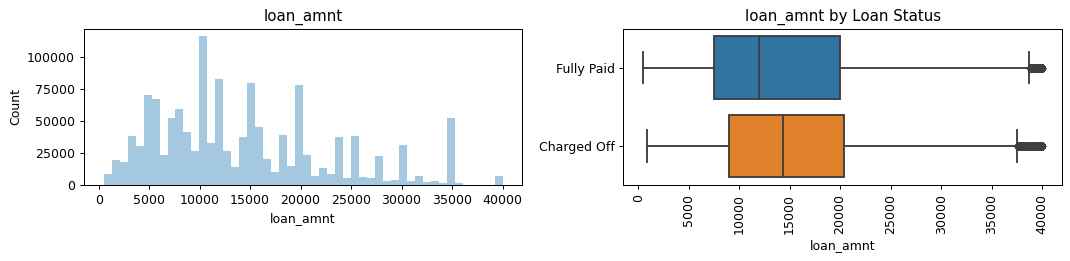

In [18]:
plot_feature('loan_amnt', True)

In [19]:
#All loans are not unique. Some loans appear many times and some do not. So, the company has certain range to lend.

#For Column term

df.term.value_counts()

 36 months    1020743
 60 months     324567
Name: term, dtype: int64

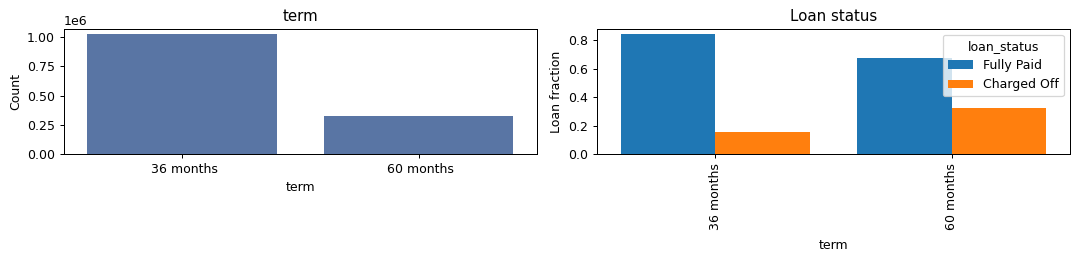

In [20]:
plot_feature('term', False)

In [21]:
#For Column Interest rate i.e. int_rate

len(df.int_rate.value_counts())

654

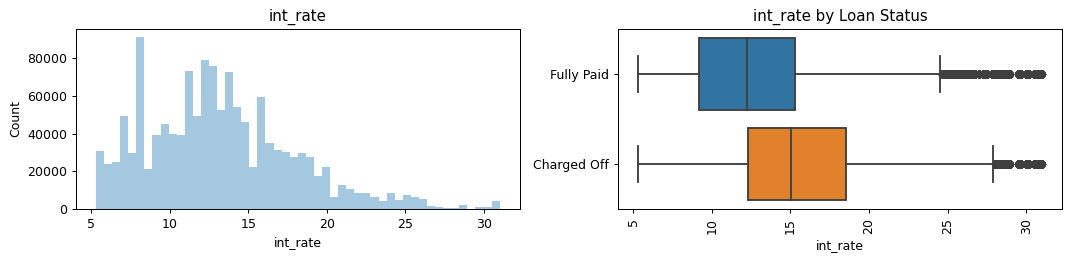

In [22]:
plot_feature('int_rate', True)

In [23]:
#From above graph we can see that those who were charged off, had to pay high interest rate

#For Column Grade and sub-grade

df.grade.value_counts()

B    392741
C    381686
A    235090
D    200953
E     93650
F     32058
G      9132
Name: grade, dtype: int64

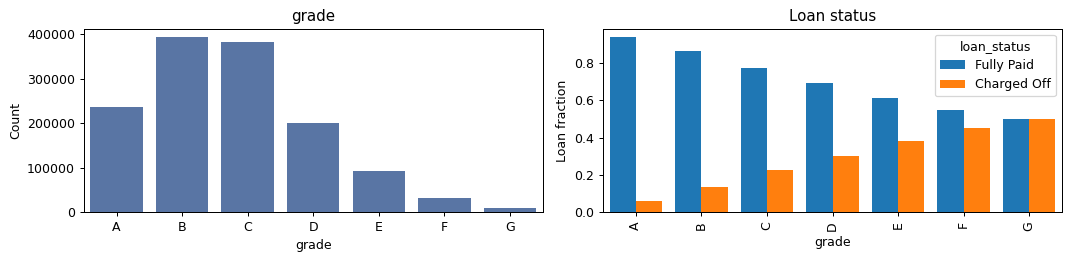

In [24]:
#From above code, we know that sub-grade has 35 unique categories
plot_feature('grade', False)

In [25]:
df.sub_grade.value_counts()
len(df.sub_grade.value_counts())

35

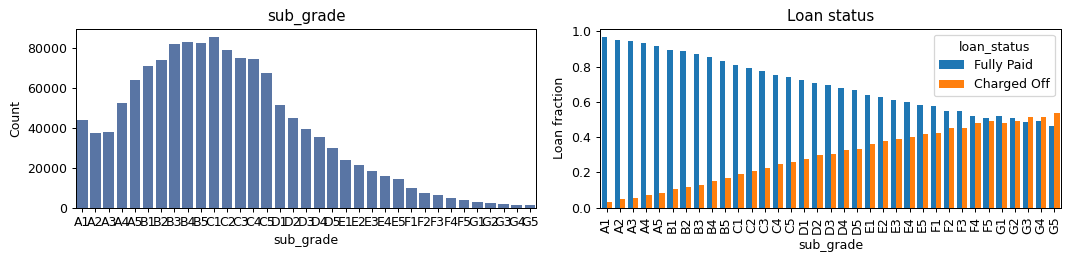

In [26]:
plot_feature('sub_grade', False)

In [27]:
#From above comparisons, we can see that sub-grade and grade both have same distribution and shape.
# But sub_grade has more categories or more data

#For Column: Employment title

len(df.emp_title.value_counts())

378353

In [28]:
#From above value, we can conclude that emp_title has too many unique values, which may not be good for prediction
#   So, we remove this feature along with other extra non-relavent features.

features_to_be_removed=[]
features_to_be_removed.extend(['emp_title', 'id'])

In [29]:
#Now, we check next 10 Columns or features using iloc function

df.iloc[0:5, 6: 22]

,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line
0,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003
1,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,16.06,1.0,Dec-1999
2,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000
4,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998
5,C3,Veterinary Tecnician,4 years,RENT,34000.0,Source Verified,Dec-2015,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,300xx,GA,10.20,0.0,Oct-1987


In [30]:
#For Column emp_length
df.emp_length.value_counts()

10+ years    442199
2 years      121743
< 1 year     108061
3 years      107597
1 year        88494
5 years       84154
4 years       80556
6 years       62733
8 years       60701
7 years       59624
9 years       50937
Name: emp_length, dtype: int64

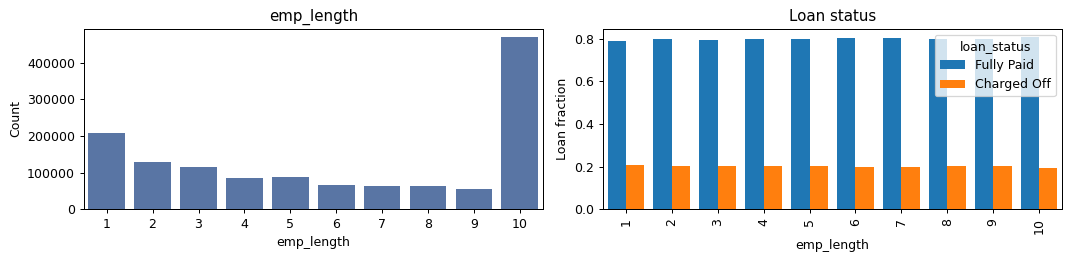

In [31]:
#The column emp_length has NaN values, so to remove it we fill it with previous column values.

df.emp_length.fillna(method='ffill',inplace=True)
df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df['emp_length'] = df['emp_length'].astype(int)
plot_feature('emp_length', False)

In [32]:
#Feature Home Ownership
df.home_ownership.value_counts()

MORTGAGE    665579
RENT        534421
OWN         144832
ANY            286
OTHER          144
NONE            48
Name: home_ownership, dtype: int64

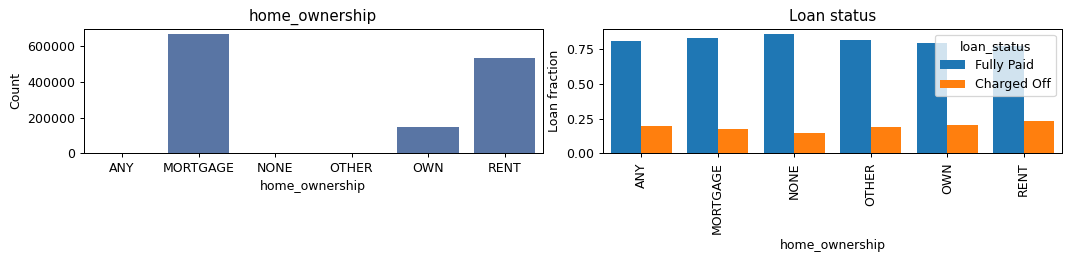

In [33]:
plot_feature('home_ownership', False)

In [34]:
#Feature verification status

df.verification_status.value_counts()

Source Verified    521273
Verified           418336
Not Verified       405701
Name: verification_status, dtype: int64

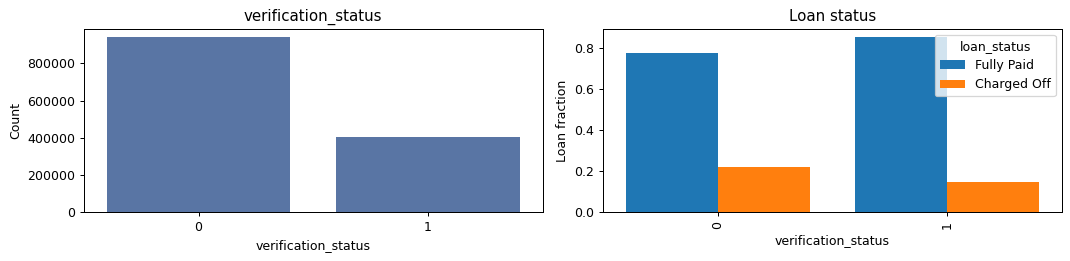

In [35]:
df.verification_status = df.verification_status.map(lambda x: 1 if x == 'Not Verified' else 0)
plot_feature('verification_status', False)

In [36]:
#In above graph, we can see from right plot that those applicants whose source was verified are more likely to be charged off.


#Feature issue_d


df.issue_d.value_counts()

Mar-2016    48937
Oct-2015    42986
Jul-2015    41053
Dec-2015    39002
Oct-2014    36072
            ...  
Aug-2007       33
Sep-2008       32
Jul-2007       30
Sep-2007       18
Jun-2007        1
Name: issue_d, Length: 139, dtype: int64

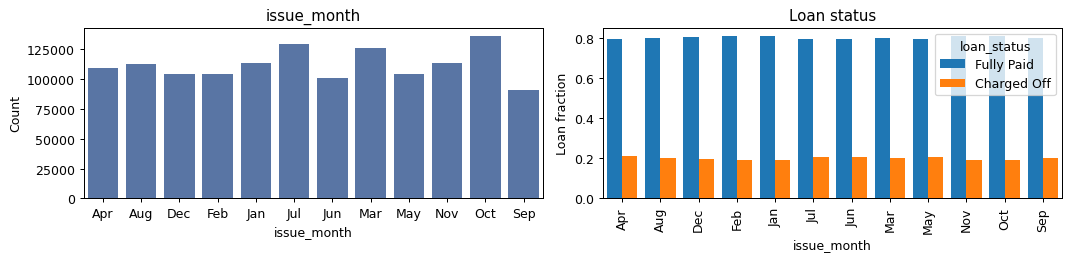

In [37]:
#We want to keep our data independent of year.So,we remove years and consider only month

df['issue_month'] = pd.Series(df.issue_d).str.replace(r'-\d+', '')
plot_feature('issue_month', False)

In [38]:
#Feature Purpose
df.purpose.value_counts()

debt_consolidation    780321
credit_card           295279
home_improvement       87504
other                  77875
major_purchase         29425
medical                15554
small_business         15416
car                    14585
moving                  9480
vacation                9065
house                   7253
wedding                 2294
renewable_energy         933
educational              326
Name: purpose, dtype: int64

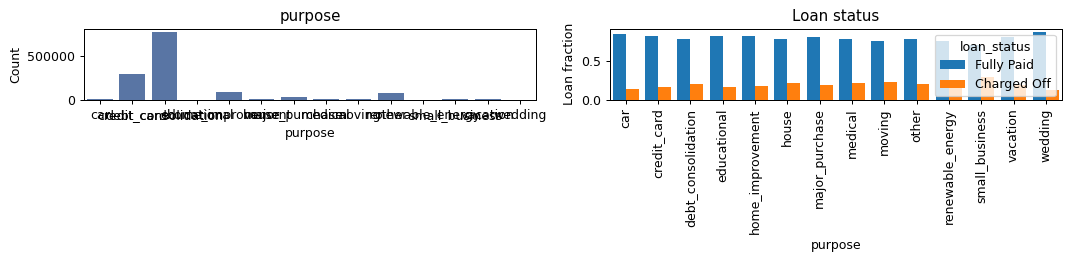

In [39]:
plot_feature('purpose', False)

In [40]:
#Here, we can see who took loan for what purpose and which category of people paid full or were charged


#Feature addr_state

len(df.addr_state.value_counts())

51

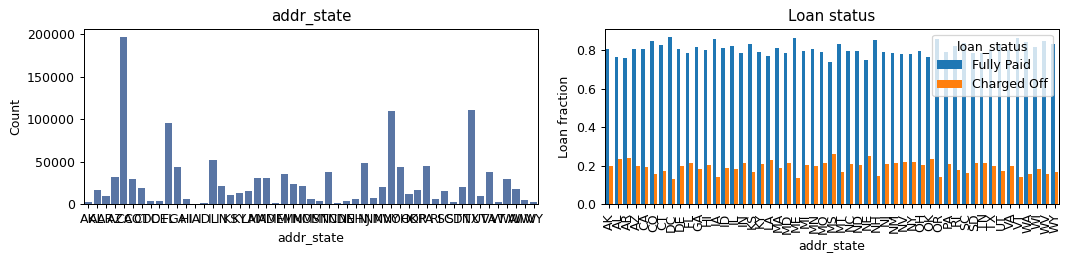

In [41]:
plot_feature('addr_state',False)

In [42]:
#If we look at the plot, we see that certain states applicants paid back more than others.

#Finally, removing remaining features
features_to_be_removed.extend(['url','title','zip_code'])

In [43]:
df.iloc[0:5, 20: 31]

,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util
0,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7
1,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2
2,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2
4,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5
5,0.0,Oct-1987,690.0,694.0,0.0,NaN,NaN,5.0,0.0,8822.0,68.4


In [44]:
features_to_be_removed.extend(['issue_d','earliest_cr_line', 'mths_since_last_delinq', 'mths_since_last_record', 'inq_last_6mths', 
                               'mths_since_last_delinq', 'mths_since_last_record'])

In [45]:
df.iloc[0:5, 30: 41]

,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d
0,29.7,13.0,w,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019
1,19.2,38.0,w,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016
2,56.2,18.0,w,22705.924294,22705.92,20000.0,2705.92,0.0,0.0,0.0,Jun-2017
4,64.5,35.0,w,11740.500000,11740.50,10400.0,1340.50,0.0,0.0,0.0,Jul-2016
5,68.4,6.0,w,13708.948530,13708.95,11950.0,1758.95,0.0,0.0,0.0,May-2017


In [46]:
df.initial_list_status.value_counts()

w    784010
f    561300
Name: initial_list_status, dtype: int64

In [47]:
df.initial_list_status = df.initial_list_status.map(lambda x: 1 if x== 'w' else 0)
#plot_feature('initial_list_status',False)

In [48]:
features_to_be_removed.extend(['total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 
                               'total_rec_int', 'total_rec_late_fee'])

In [49]:
df.iloc[0:5, 41: 51]

,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal
0,122.67,Mar-2019,564.0,560.0,0.0,30.0,Individual,0.0,722.0,144904.0
1,926.35,Mar-2019,699.0,695.0,0.0,NaN,Individual,0.0,0.0,204396.0
2,15813.30,Mar-2019,704.0,700.0,0.0,NaN,Joint App,0.0,0.0,189699.0
4,10128.96,Mar-2018,704.0,700.0,0.0,NaN,Individual,0.0,0.0,331730.0
5,7653.56,May-2017,759.0,755.0,0.0,NaN,Individual,0.0,0.0,12798.0


In [50]:
features_to_be_removed.extend(['recoveries', 'collection_recovery_fee', 'last_pymnt_d', 
                               'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high',
                               'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog'])

In [51]:
df.iloc[0:5, 51: 61]

,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc
0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0
1,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0
2,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0
4,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0
5,0.0,1.0,0.0,0.0,338.0,3976.0,99.0,0.0,0.0,4522.0


In [52]:
features_to_be_removed.extend([ 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 
                              'total_rev_hi_lim', 'avg_cur_bal', 'bc_open_to_buy', 
                               'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt'])

In [53]:
df.iloc[0:5, 61: 71]

,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths
0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0
1,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0
2,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0
4,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0
5,76.0,12900.0,0.0,0.0,0.0,0.0,2560.0,844.0,91.0,0.0


In [54]:
features_to_be_removed.extend(['mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 
                               'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 
                               'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 
                               'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 
                               'num_accts_ever_120_pd'])

In [55]:
df.iloc[0:5, 71: 81]

,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq
0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0
1,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0
2,0.0,125.0,184.0,14.0,14.0,5.0,101.0,NaN,10.0,NaN
4,0.0,128.0,210.0,4.0,4.0,6.0,4.0,12.0,1.0,12.0
5,0.0,338.0,54.0,32.0,32.0,0.0,36.0,NaN,NaN,NaN


In [56]:
features_to_be_removed.extend(['num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 
                               'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 
                               'num_rev_accts', 'num_rev_tl_bal_gt_0', 
                               'num_sats', 'num_tl_120dpd_2m'])

In [57]:
df.iloc[0:5, 81: 91]

,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats
0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0
1,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0
2,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0
4,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0
5,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0


In [58]:
features_to_be_removed.extend(['num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 
                               'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 
                               'total_bal_ex_mort', 'total_bc_limit'])

In [59]:
df.iloc[0:5, 90:]

,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,issue_month
0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,Cash,N,Dec
1,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,Cash,N,Dec
2,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,Cash,N,Dec
4,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,Cash,N,Dec
5,5.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,Cash,N,Dec


In [60]:
df.debt_settlement_flag.value_counts()

N    1312034
Y      33276
Name: debt_settlement_flag, dtype: int64

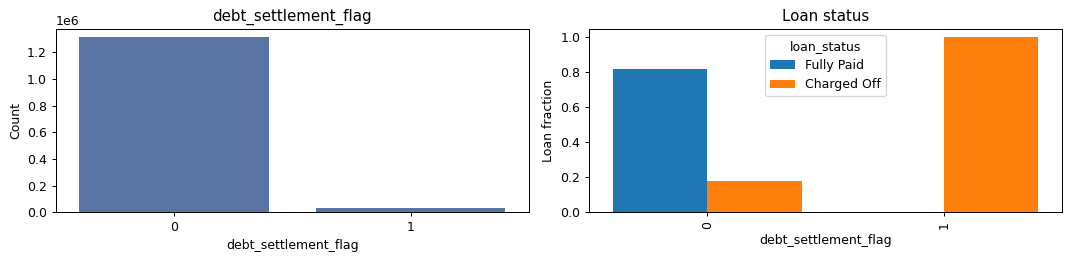

In [61]:
df.debt_settlement_flag = df.debt_settlement_flag.map(lambda x: 0 if x == 'N' else 1)
plot_feature('debt_settlement_flag',False)

In [62]:
features_to_be_removed.extend(['debt_settlement_flag', 'total_il_high_credit_limit'])

In [63]:
#Now, after evaluating and checking all columns, we check the removed features

len(set(features_to_be_removed))

62

In [64]:
#So, we have 61 features or columns which need to be removed
print(features_to_be_removed)

['emp_title', 'id', 'url', 'title', 'zip_code', 'issue_d', 'earliest_cr_line', 'mths_since_last_delinq', 'mths_since_last_record', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev

In [65]:
#Finally we drop the above features
df_selected = df.drop(list(set(features_to_be_removed)), axis = 1)
df_selected.shape

(1345310, 44)

In [66]:
df_selected.iloc[0:5, 0:10]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status
0,3600.0,36 months,13.99,123.03,C,C4,10,MORTGAGE,55000.0,1
1,24700.0,36 months,11.99,820.28,C,C1,10,MORTGAGE,65000.0,1
2,20000.0,60 months,10.78,432.66,B,B4,10,MORTGAGE,63000.0,1
4,10400.0,60 months,22.45,289.91,F,F1,3,MORTGAGE,104433.0,0
5,11950.0,36 months,13.44,405.18,C,C3,4,RENT,34000.0,0


In [67]:
df_selected.iloc[0:5, 10:20]

,loan_status,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal
0,Fully Paid,debt_consolidation,PA,5.91,0.0,675.0,679.0,7.0,0.0,2765.0
1,Fully Paid,small_business,SD,16.06,1.0,715.0,719.0,22.0,0.0,21470.0
2,Fully Paid,home_improvement,IL,10.78,0.0,695.0,699.0,6.0,0.0,7869.0
4,Fully Paid,major_purchase,PA,25.37,1.0,695.0,699.0,12.0,0.0,21929.0
5,Fully Paid,debt_consolidation,GA,10.20,0.0,690.0,694.0,5.0,0.0,8822.0


In [68]:
df_selected.iloc[0:5, 20:30]

,revol_util,total_acc,initial_list_status,application_type,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il
0,29.7,13.0,1,Individual,2.0,2.0,0.0,1.0,21.0,4981.0
1,19.2,38.0,1,Individual,1.0,1.0,0.0,1.0,19.0,18005.0
2,56.2,18.0,1,Joint App,0.0,1.0,0.0,4.0,19.0,10827.0
4,64.5,35.0,1,Individual,1.0,3.0,0.0,3.0,14.0,73839.0
5,68.4,6.0,1,Individual,0.0,1.0,0.0,0.0,338.0,3976.0


In [69]:
df_selected.iloc[0:5, 30:]

,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,mort_acc,pub_rec_bankruptcies,tax_liens,disbursement_method,issue_month
0,36.0,3.0,3.0,722.0,34.0,3.0,1.0,4.0,4.0,1.0,0.0,0.0,Cash,Dec
1,73.0,2.0,3.0,6472.0,29.0,0.0,0.0,6.0,4.0,4.0,0.0,0.0,Cash,Dec
2,73.0,0.0,2.0,2081.0,65.0,2.0,5.0,1.0,6.0,5.0,0.0,0.0,Cash,Dec
4,84.0,4.0,7.0,9702.0,78.0,2.0,1.0,3.0,10.0,6.0,0.0,0.0,Cash,Dec
5,99.0,0.0,0.0,4522.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cash,Dec


In [70]:
features_to_be_removed2=(['dti','delinq_2yrs','open_acc_6m','open_act_il','open_il_12m','open_il_24m','mths_since_rcnt_il',
                               'il_util','open_rv_12m','open_rv_24m','inq_fi','total_cu_tl',
                               'inq_last_12m','acc_open_past_24mths','mort_acc','pub_rec_bankruptcies','tax_liens'])

In [71]:
#Finally we drop the above features
df_selected = df_selected.drop(list(set(features_to_be_removed2)), axis = 1)
df_selected.shape

(1345310, 27)

In [72]:
features_to_be_removed3=(['total_bal_il','max_bal_bc','all_util'])
df_selected = df_selected.drop(list(set(features_to_be_removed3)), axis = 1)
df_selected.shape

(1345310, 24)

In [73]:
#Lets check if there are missing values in the above features
df_dtypes = pd.merge(df_selected.isnull().sum(axis = 0).sort_values().to_frame('missing_value').reset_index(),
         df_selected.dtypes.to_frame('feature_type').reset_index(),
         on = 'index',
         how = 'inner')

df_dtypes.sort_values(['missing_value', 'feature_type'])

,index,missing_value,feature_type
15,emp_length,0,int32
2,initial_list_status,0,int64
12,verification_status,0,int64
0,loan_amnt,0,float64
3,total_acc,0,float64
4,revol_bal,0,float64
5,pub_rec,0,float64
6,open_acc,0,float64
7,fico_range_high,0,float64
8,fico_range_low,0,float64


In [74]:
#From above code, we see that 'desc' and 'revol_util' have missing values.
#Filling the 'revol_util' column's missing values with the mean
df_selected['revol_util']=df_selected['revol_util'].fillna(df_selected['revol_util'].mean())

In [75]:
#Lets check if there are missing values in the above features
df_dtypes = pd.merge(df_selected.isnull().sum(axis = 0).sort_values().to_frame('missing_value').reset_index(),
         df_selected.dtypes.to_frame('feature_type').reset_index(),
         on = 'index',
         how = 'inner')

df_dtypes.sort_values(['missing_value', 'feature_type'])

,index,missing_value,feature_type
16,emp_length,0,int32
2,initial_list_status,0,int64
13,verification_status,0,int64
0,loan_amnt,0,float64
3,total_acc,0,float64
4,revol_util,0,float64
5,revol_bal,0,float64
6,pub_rec,0,float64
7,open_acc,0,float64
8,fico_range_high,0,float64


In [76]:
df_selected.isna().sum().sum()

0

In [77]:
df_selected.shape

(1345310, 24)

In [78]:
df_selected.iloc[0:5,:]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,disbursement_method,issue_month
0,3600.0,36 months,13.99,123.03,C,C4,10,MORTGAGE,55000.0,1,...,679.0,7.0,0.0,2765.0,29.7,13.0,1,Individual,Cash,Dec
1,24700.0,36 months,11.99,820.28,C,C1,10,MORTGAGE,65000.0,1,...,719.0,22.0,0.0,21470.0,19.2,38.0,1,Individual,Cash,Dec
2,20000.0,60 months,10.78,432.66,B,B4,10,MORTGAGE,63000.0,1,...,699.0,6.0,0.0,7869.0,56.2,18.0,1,Joint App,Cash,Dec
4,10400.0,60 months,22.45,289.91,F,F1,3,MORTGAGE,104433.0,0,...,699.0,12.0,0.0,21929.0,64.5,35.0,1,Individual,Cash,Dec
5,11950.0,36 months,13.44,405.18,C,C3,4,RENT,34000.0,0,...,694.0,5.0,0.0,8822.0,68.4,6.0,1,Individual,Cash,Dec


In [79]:
#Removing all extra strings from certain columns
df_selected.term = df_selected.term.str.replace('months', '').astype(np.int)

In [80]:
#Encoding
#Now, we encode few of the categorical features'''
from pandas.api.types import CategoricalDtype
df_selected.issue_month = df_selected.issue_month.astype(CategoricalDtype(categories=np.unique(df_selected.issue_month))).cat.codes



In [81]:
df_selected.purpose = df_selected.purpose.astype(CategoricalDtype(categories=np.unique(df_selected.purpose))).cat.codes
df_selected.home_ownership = df_selected.home_ownership.astype(CategoricalDtype(categories = np.unique(df_selected.home_ownership))).cat.codes
df_selected.grade = df_selected.grade.astype(CategoricalDtype(categories = np.unique(df_selected.grade))).cat.codes
df_selected.sub_grade = df_selected.sub_grade.astype(CategoricalDtype(categories = np.unique(df_selected.sub_grade))).cat.codes
df_selected.addr_state = df_selected.addr_state.astype(CategoricalDtype(categories = np.unique(df_selected.addr_state))).cat.codes
df_selected.loan_status = df_selected.loan_status.astype(CategoricalDtype(categories=np.unique(df_selected.loan_status))).cat.codes

In [82]:
df_selected.application_type = df_selected.application_type.astype(CategoricalDtype(categories=np.unique(df_selected.application_type))).cat.codes
df_selected.disbursement_method = df_selected.disbursement_method.astype(CategoricalDtype(categories=np.unique(df_selected.disbursement_method))).cat.codes
df_selected.term = df_selected.term.astype(CategoricalDtype(categories = np.unique(df_selected.term))).cat.codes


In [83]:
df_selected.iloc[0:5,:]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,disbursement_method,issue_month
0,3600.0,0,13.99,123.03,2,13,10,1,55000.0,1,...,679.0,7.0,0.0,2765.0,29.7,13.0,1,0,0,2
1,24700.0,0,11.99,820.28,2,10,10,1,65000.0,1,...,719.0,22.0,0.0,21470.0,19.2,38.0,1,0,0,2
2,20000.0,1,10.78,432.66,1,8,10,1,63000.0,1,...,699.0,6.0,0.0,7869.0,56.2,18.0,1,1,0,2
4,10400.0,1,22.45,289.91,5,25,3,1,104433.0,0,...,699.0,12.0,0.0,21929.0,64.5,35.0,1,0,0,2
5,11950.0,0,13.44,405.18,2,12,4,5,34000.0,0,...,694.0,5.0,0.0,8822.0,68.4,6.0,1,0,0,2


In [84]:
df=df_selected

In [85]:
df.shape

(1345310, 24)

In [86]:
df.describe()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,disbursement_method,issue_month
count,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,...,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06
mean,1.441997e+04,2.412581e-01,1.323962e+01,4.380755e+02,1.745809e+00,1.069302e+01,6.052432e+00,2.911998e+00,7.624764e+04,3.015669e-01,...,7.001852e+02,1.159352e+01,2.152760e-01,1.624811e+04,5.181002e+01,2.498084e+01,5.827727e-01,1.917774e-02,5.128929e-03,5.531292e+00
std,8.717051e+03,4.278467e-01,4.768716e+00,2.615126e+02,1.295071e+00,6.449912e+00,3.562249e+00,1.915676e+00,6.992510e+04,4.589384e-01,...,3.185316e+01,5.473789e+00,6.018647e-01,2.232817e+04,2.451326e+01,1.199847e+01,4.931013e-01,1.371494e-01,7.143268e-02,3.412514e+00
min,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,6.290000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,0.000000e+00,9.750000e+00,2.484800e+02,1.000000e+00,6.000000e+00,2.000000e+00,1.000000e+00,4.578000e+04,0.000000e+00,...,6.740000e+02,8.000000e+00,0.000000e+00,5.943000e+03,3.350000e+01,1.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
50%,1.200000e+04,0.000000e+00,1.274000e+01,3.754300e+02,2.000000e+00,1.000000e+01,6.000000e+00,4.000000e+00,6.500000e+04,0.000000e+00,...,6.940000e+02,1.100000e+01,0.000000e+00,1.113400e+04,5.210000e+01,2.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
75%,2.000000e+04,0.000000e+00,1.599000e+01,5.807300e+02,2.000000e+00,1.400000e+01,1.000000e+01,5.000000e+00,9.000000e+04,1.000000e+00,...,7.140000e+02,1.400000e+01,0.000000e+00,1.975575e+04,7.070000e+01,3.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00
max,4.000000e+04,1.000000e+00,3.099000e+01,1.719830e+03,6.000000e+00,3.400000e+01,1.000000e+01,5.000000e+00,1.099920e+07,1.000000e+00,...,8.500000e+02,9.000000e+01,8.600000e+01,2.904836e+06,8.923000e+02,1.760000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.100000e+01


In [87]:
pd.set_option('float_format', '{:f}'.format)

In [88]:
df.describe()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,disbursement_method,issue_month
count,1345310.000000,1345310.000000,1345310.000000,1345310.000000,1345310.000000,1345310.000000,1345310.000000,1345310.000000,1345310.000000,1345310.000000,...,1345310.000000,1345310.000000,1345310.000000,1345310.000000,1345310.000000,1345310.000000,1345310.000000,1345310.000000,1345310.000000,1345310.000000
mean,14419.972014,0.241258,13.239619,438.075533,1.745809,10.693016,6.052432,2.911998,76247.636414,0.301567,...,700.185177,11.593520,0.215276,16248.114860,51.810022,24.980839,0.582773,0.019178,0.005129,5.531292
std,8717.050787,0.427847,4.768716,261.512604,1.295071,6.449912,3.562249,1.915676,69925.098427,0.458938,...,31.853161,5.473789,0.601865,22328.168731,24.513261,11.998474,0.493101,0.137149,0.071433,3.412514
min,500.000000,0.000000,5.310000,4.930000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,629.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,0.000000,9.750000,248.480000,1.000000,6.000000,2.000000,1.000000,45780.000000,0.000000,...,674.000000,8.000000,0.000000,5943.000000,33.500000,16.000000,0.000000,0.000000,0.000000,3.000000
50%,12000.000000,0.000000,12.740000,375.430000,2.000000,10.000000,6.000000,4.000000,65000.000000,0.000000,...,694.000000,11.000000,0.000000,11134.000000,52.100000,23.000000,1.000000,0.000000,0.000000,5.000000
75%,20000.000000,0.000000,15.990000,580.730000,2.000000,14.000000,10.000000,5.000000,90000.000000,1.000000,...,714.000000,14.000000,0.000000,19755.750000,70.700000,32.000000,1.000000,0.000000,0.000000,9.000000
max,40000.000000,1.000000,30.990000,1719.830000,6.000000,34.000000,10.000000,5.000000,10999200.000000,1.000000,...,850.000000,90.000000,86.000000,2904836.000000,892.300000,176.000000,1.000000,1.000000,1.000000,11.000000


In [89]:
standardized_df=(df-df.min())/(df.max()-df.min())

In [90]:
standardized_df.describe()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,disbursement_method,issue_month
count,1345310.000000,1345310.000000,1345310.000000,1345310.000000,1345310.000000,1345310.000000,1345310.000000,1345310.000000,1345310.000000,1345310.000000,...,1345310.000000,1345310.000000,1345310.000000,1345310.000000,1345310.000000,1345310.000000,1345310.000000,1345310.000000,1345310.000000,1345310.000000
mean,0.352404,0.241258,0.308786,0.252578,0.290968,0.314500,0.561381,0.582400,0.006932,0.301567,...,0.322105,0.128817,0.002503,0.005593,0.058063,0.132074,0.582773,0.019178,0.005129,0.502845
std,0.220685,0.427847,0.185698,0.152494,0.215845,0.189703,0.395805,0.383135,0.006357,0.458938,...,0.144132,0.060820,0.006998,0.007687,0.027472,0.068957,0.493101,0.137149,0.071433,0.310229
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.189873,0.000000,0.172897,0.142020,0.166667,0.176471,0.111111,0.200000,0.004162,0.000000,...,0.203620,0.088889,0.000000,0.002046,0.037543,0.080460,0.000000,0.000000,0.000000,0.272727
50%,0.291139,0.000000,0.289330,0.216048,0.333333,0.294118,0.555556,0.800000,0.005910,0.000000,...,0.294118,0.122222,0.000000,0.003833,0.058388,0.120690,1.000000,0.000000,0.000000,0.454545
75%,0.493671,0.000000,0.415888,0.335763,0.333333,0.411765,1.000000,1.000000,0.008182,1.000000,...,0.384615,0.155556,0.000000,0.006801,0.079233,0.172414,1.000000,0.000000,0.000000,0.818182
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
#CORRELATION

corr = df.corr(method = 'spearman')
new_corr = corr.abs()
new_corr.loc[:,:] = np.tril(new_corr, k=-1)
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)
new_corr[new_corr.correlation > 0.4]

,level_0,level_1,correlation
349,fico_range_high,fico_range_low,1.000000
122,sub_grade,int_rate,0.983154
124,sub_grade,grade,0.972357
72,installment,loan_amnt,0.969219
98,grade,int_rate,0.956461
471,total_acc,open_acc,0.694536
192,annual_inc,loan_amnt,0.481361
408,revol_bal,loan_amnt,0.466561
195,annual_inc,installment,0.460003
411,revol_bal,installment,0.454756


In [94]:
#df.to_csv('./dataset/Cleaned_Data.csv')